In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

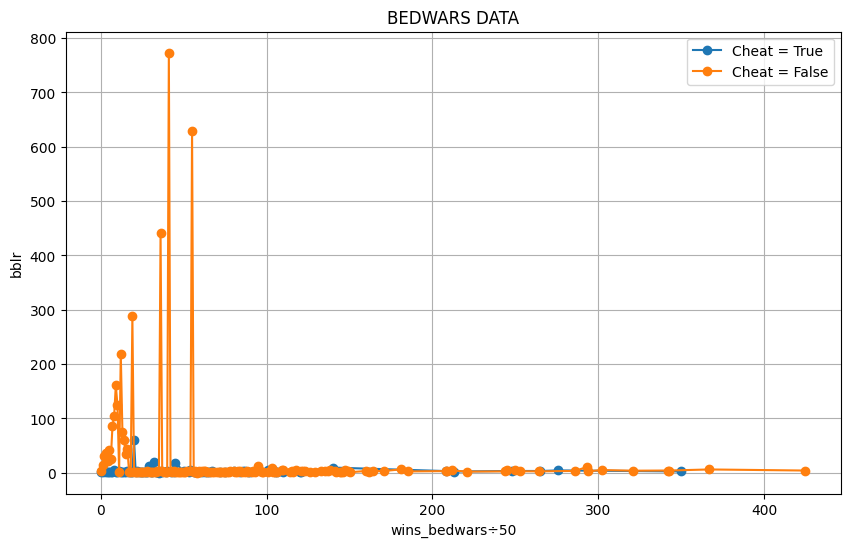

In [311]:
# CSVファイルを読み込む
df = pd.read_csv('Data.csv')

# データをランダムに削除する割合
remove_ratio = 0  # 90%のデータを削除

# データの行数を取得
num_rows = df.shape[0]

# ランダムに削除する行数を計算
num_remove = int(num_rows * remove_ratio)

# ラベルを変数にしておく
x_label = 'wins_bedwars'
y_label = 'bblr'

# # データをランダムにシャッフルして、先頭から削除する行を選択
# df_reduced = df.copy()
# df_reduced[y_label] = df_reduced[y_label] + np.random.normal(0, 0.1, len(df_reduced))
# remove_indices = np.random.choice(df_reduced.index, num_remove, replace=False)
# df_reduced = df_reduced.drop(remove_indices)

split = 50
# bedwars_levelを10で割った整数を新しい列として追加
df[x_label] = df[x_label] // split

title = 'BEDWARS DATA'

df['losses_final_ratio'] = df['losses_bedwars'] / df['final_deaths_bedwars']
# 10れべ毎の平均を計算
mean_fall_deaths_bedwars = df.groupby([x_label, 'Cheat'])[y_label].mean()
# データをグラフで表示
plt.figure(figsize=(10, 6))
for cheat in [0, 1]:
    mean_values = mean_fall_deaths_bedwars.loc[:, cheat]
    plt.plot(mean_values.index, mean_values.values, marker='o', label=f'Cheat = {not bool(cheat)}')

plt.xlabel(f"{x_label}÷{split}")
plt.ylabel(y_label)
plt.title(title)
plt.grid(True)
plt.legend()
plt.show()

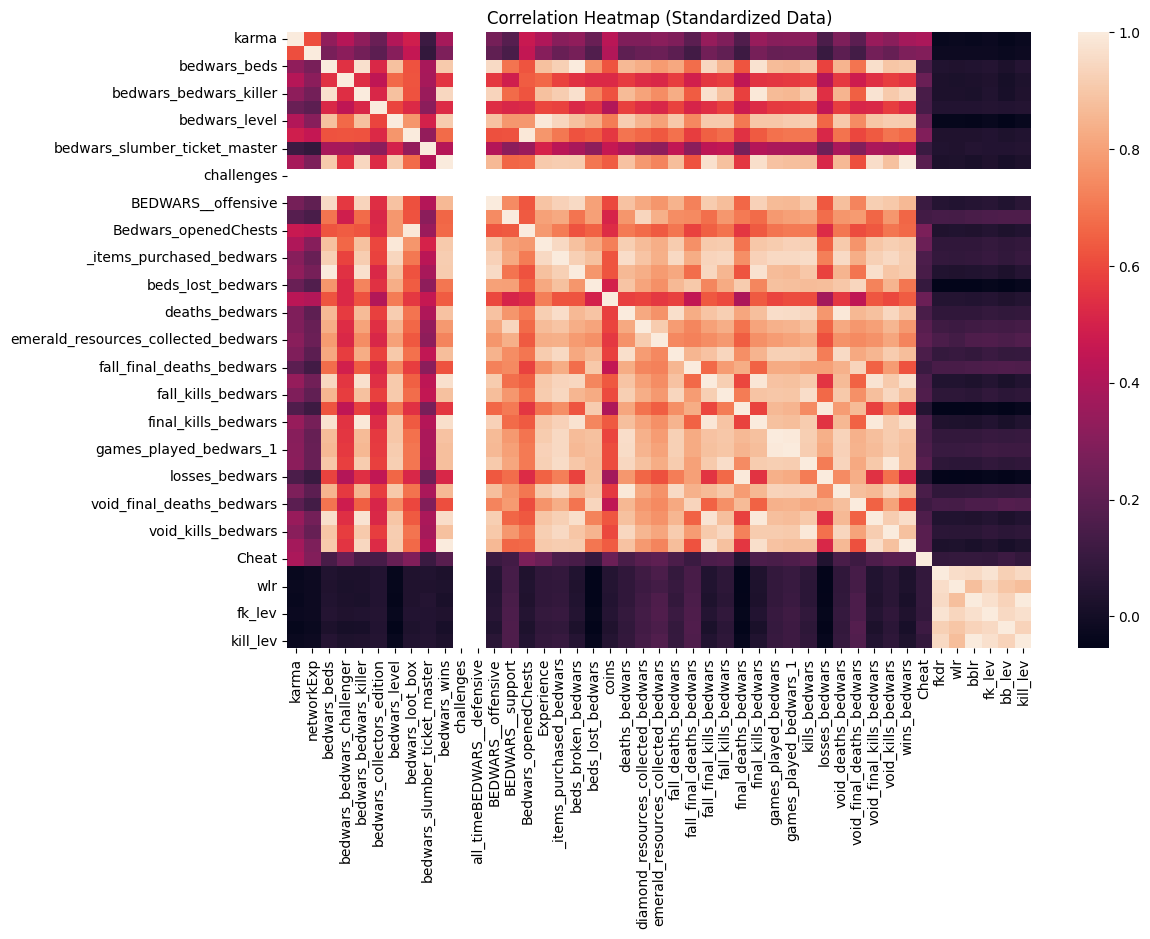

In [312]:
# CSVファイルを読み込む
df = pd.read_csv('Data.csv')

# 特徴量を正規化する
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# 正規化したデータフレームを作成
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

# ヒートマップを描画
plt.figure(figsize=(12, 8))
sns.heatmap(scaled_df.corr(), fmt=".2f")
plt.title('Correlation Heatmap (Standardized Data)')
plt.show()